# Hyperparamerter analysis

This notebook is driven by the question 'What are the best hyperparameters for the model?'.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_all = pd.read_csv('Hyperparameter.csv')
df_all.describe()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
count,1.250000e+02,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.000000e-03,118.528000,3.992000,18.048000,96.640000,88.800164,0.934789,22144.000000,2700.866570
std,6.531391e-19,85.346408,1.003992,10.001497,85.763967,1.166886,0.020627,38093.076058,2021.588210
min,1.000000e-03,32.000000,3.000000,8.000000,16.000000,80.350000,0.767797,300.000000,26.615848
25%,1.000000e-03,32.000000,3.000000,8.000000,32.000000,88.630003,0.933888,15000.000000,1281.437280
50%,1.000000e-03,128.000000,3.000000,16.000000,64.000000,88.999999,0.936916,20000.000000,2098.137537
75%,1.000000e-03,128.000000,5.000000,32.000000,128.000000,89.260000,0.940750,20000.000000,3395.016783
max,1.000000e-03,256.000000,5.000000,32.000000,256.000000,90.535986,0.958732,400000.000000,13500.279993


# Hyperparameter ordered by best auc-value

In [3]:
df_all.sort_values(by='Auc', ascending=False).head(5)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
124,0.001,128,5,8,16,90.535986,0.958732,400000,7086.617771
123,0.001,128,5,8,16,90.426004,0.956025,200000,3616.143796
122,0.001,128,5,8,16,89.778000,0.950490,50000,13500.279993
74,0.001,128,5,8,16,89.800000,0.946971,20000,2845.472721
106,0.001,256,5,8,64,88.950002,0.945602,13100,3803.510775


# Scattermatrix to compare every variable

In [8]:
def plotScattermatrix(df):
    plt.style.use('seaborn-ticks')
    pd.scatter_matrix(df[df['Auc']>0.8][['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']], alpha=1.0, figsize=(10, 10), c='b', diagonal='kde')
    plt.show()
    
def plotCorrelation(df):
    plt.style.use('seaborn-white')
    f, ax = plt.subplots(figsize=(12, 3))
    corr = df[['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']].corr()
    sns.heatmap(corr.tail(2), mask=np.zeros_like(corr.tail(2), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    plt.show()

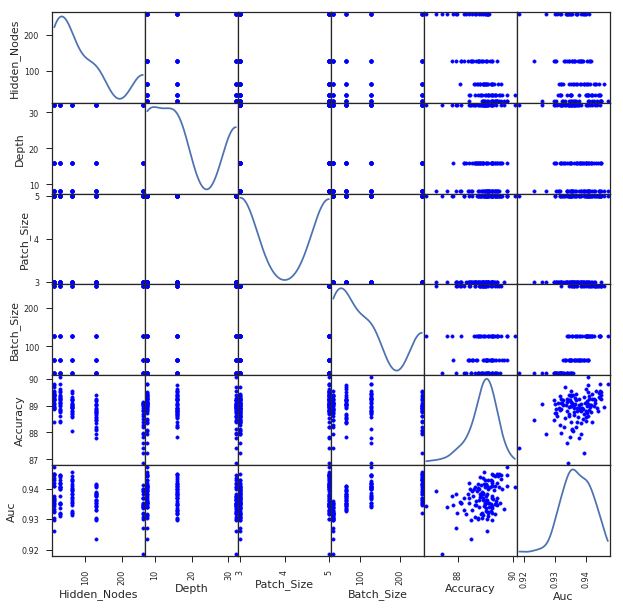

Correlation - All CNNs


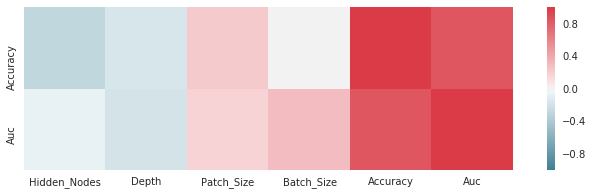

In [9]:
plotScattermatrix(df_all)
print('Correlation - All CNNs')
plotCorrelation(df_all)

In [10]:
for column in ['Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes']:
    mean = df_all[df_all['Auc']>0.8].groupby(column)['Auc'].mean().sort_values(ascending=False)
    print(mean, '\n')

Batch_Size
256    0.940108
128    0.939850
64     0.936787
32     0.931162
Name: Auc, dtype: float64 

Patch_Size
5    0.938167
3    0.935810
Name: Auc, dtype: float64 

Depth
8     0.937857
16    0.937621
32    0.935355
Name: Auc, dtype: float64 

Hidden_Nodes
32     0.938559
64     0.938252
16     0.937823
128    0.935748
256    0.934513
Name: Auc, dtype: float64 



# Analyse only the examples which where early stopped

In [11]:
df_stopped = df_all[(df_all['Steps']> 500) & (df_all['Steps']<20000)]

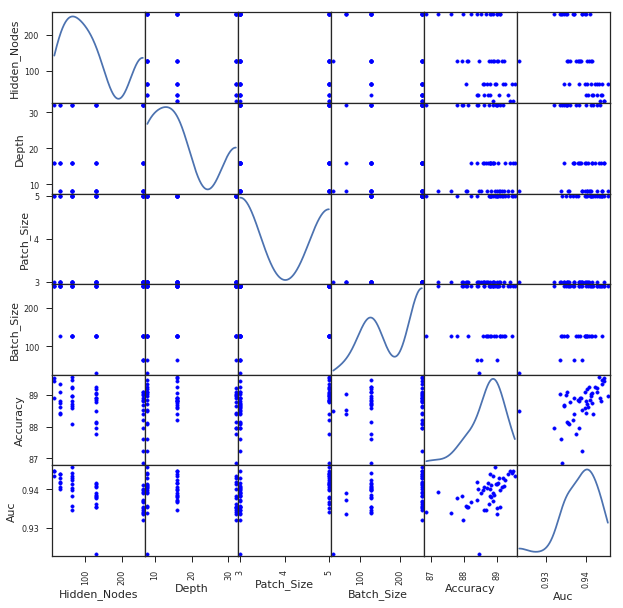

Correlation - Early-stopped CNNs


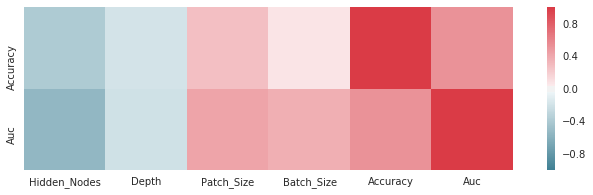

In [12]:
plotScattermatrix(df_stopped)
print('Correlation - Early-stopped CNNs')
plotCorrelation(df_stopped)

In [13]:
for column in ['Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes']:
    mean = df_all[df_all['Auc']>0.8].groupby(column)['Auc'].mean().sort_values(ascending=False)
    print(mean, '\n')

Batch_Size
256    0.940108
128    0.939850
64     0.936787
32     0.931162
Name: Auc, dtype: float64 

Patch_Size
5    0.938167
3    0.935810
Name: Auc, dtype: float64 

Depth
8     0.937857
16    0.937621
32    0.935355
Name: Auc, dtype: float64 

Hidden_Nodes
32     0.938559
64     0.938252
16     0.937823
128    0.935748
256    0.934513
Name: Auc, dtype: float64 



Correlation - All CNNs


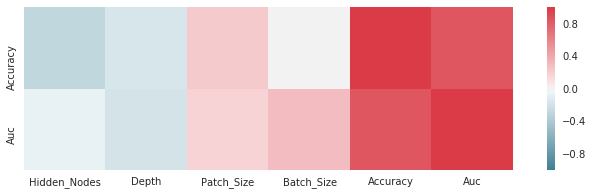

Correlation - Early-stopped CNNs


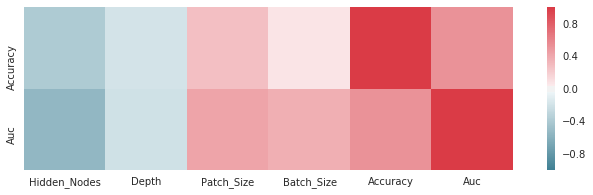

In [14]:
print('Correlation - All CNNs')
plotCorrelation(df_all)
print('Correlation - Early-stopped CNNs')
plotCorrelation(df_stopped)

In [17]:
df_all.tail(20)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
100,0.001,256,3,32,32,88.440001,0.940045,13750,4757.470787
101,0.001,256,3,32,64,88.630003,0.934571,14200,5153.698223
102,0.001,256,3,32,128,87.949997,0.938231,11100,4051.198100
103,0.001,256,3,32,256,87.970001,0.931969,11050,4186.140970
104,0.001,256,5,8,16,89.260000,0.944910,20000,5617.041212
105,0.001,256,5,8,32,89.340001,0.944047,12800,3665.224629
106,0.001,256,5,8,64,88.950002,0.945602,13100,3803.510775
107,0.001,256,5,8,128,89.010000,0.941374,10100,2865.604860
108,0.001,256,5,8,256,88.840002,0.941086,9750,2430.095063
109,0.001,256,5,16,16,89.510000,0.944691,14250,4472.689528
